<a href="https://colab.research.google.com/github/brucewuquant/pythonstuff/blob/master/h2o_featureipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install h2o

    100% |████████████████████████████████| 121.0MB 130kB/s 
  Stored in directory: /root/.cache/pip/wheels/ca/0a/e6/f0538dc7e67f9c76b5c93dcc3529c1a00adeed4dacd31d551a
Successfully built h2o


In [9]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
h2o.cluster().show_status()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,30 mins 45 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,4 days
H2O cluster name:,H2O_from_python_unknownUser_sgxk1x
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


H2O cluster uptime:,30 mins 45 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,4 days
H2O cluster name:,H2O_from_python_unknownUser_sgxk1x
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

In [0]:
os.chdir("drive/My Drive/Colab Notebooks/Data/FeatureEngineering")

In [17]:
!ls

application_test.csv		    installments_payments.csv
application_train.csv		    Loan-Payment-Predict.ipynb
bureau_balance.csv		    ml_sample.csv
bureau.csv			    POS_CASH_balance.csv
credit_card_balance.csv		    previous_application.csv
HomeCredit_columns_description.csv  sample_submission.csv
home-credit-default-risk.zip


In [0]:
import pandas as pd
import numpy as np
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report

In [0]:
from h2o.grid.grid_search import H2OGridSearch

In [0]:
data = pd.read_csv('ml_sample.csv')

In [0]:
data = data.dropna()

In [21]:
data.head()

,0,Label,Close,Volume,RVol,JumpRatio,Close_1,Close_2,Close_3,Close_4,...,DVolume_3,DMEAN_6,DMEAN137_6,DMEAN_12,DMEAN137_12,DMEAN_24,DMEAN137_24,RVol_1,RVol_2,RVol_3
160,2016-01-05 21:10:00,0.0,1990.25,4418.0,0.199579,0.139945,-0.001881,-0.002508,-0.000251,0.000880,...,-496.0,2039.333333,159.666667,1940.750000,-750.333333,4503.916667,-401.833333,0.003786,0.001723,0.000471
161,2016-01-05 21:20:00,0.0,1990.75,3865.0,0.200179,0.137098,0.000880,-0.000251,0.000880,0.000251,...,392.0,-695.666667,370.500000,-761.250000,-447.833333,1541.875000,-204.291667,0.001723,0.000471,0.000599
162,2016-01-05 21:30:00,0.0,1993.00,6061.0,0.200845,0.135940,0.002263,0.000880,0.000251,0.001130,...,1788.0,-1573.166667,396.833333,-1115.833333,-384.416667,876.208333,-152.083333,0.000471,0.000599,0.000666
163,2016-01-05 21:40:00,0.0,1993.50,5181.0,0.201862,0.133654,0.001633,0.000251,0.001130,0.000251,...,-1590.0,-1500.333333,-181.000000,-991.750000,-516.166667,927.041667,-760.458333,0.000599,0.000666,0.001017
164,2016-01-05 21:50:00,0.0,1992.00,3281.0,0.202520,0.129614,0.000628,0.001130,0.000251,-0.000752,...,-91.0,-188.166667,-363.000000,-1031.583333,-493.166667,623.208333,-925.041667,0.000666,0.001017,0.000658


In [68]:
data['Label'] = data['Label'].astype(int)
data.rename(columns = {"0":'time'},inplace=  True)
data.head()

,time,Label,Close,Volume,RVol,JumpRatio,Close_1,Close_2,Close_3,Close_4,...,DVolume_3,DMEAN_6,DMEAN137_6,DMEAN_12,DMEAN137_12,DMEAN_24,DMEAN137_24,RVol_1,RVol_2,RVol_3
160,2016-01-05 21:10:00,0,1990.25,4418.0,0.199579,0.139945,-0.001881,-0.002508,-0.000251,0.000880,...,-496.0,2039.333333,159.666667,1940.750000,-750.333333,4503.916667,-401.833333,0.003786,0.001723,0.000471
161,2016-01-05 21:20:00,0,1990.75,3865.0,0.200179,0.137098,0.000880,-0.000251,0.000880,0.000251,...,392.0,-695.666667,370.500000,-761.250000,-447.833333,1541.875000,-204.291667,0.001723,0.000471,0.000599
162,2016-01-05 21:30:00,0,1993.00,6061.0,0.200845,0.135940,0.002263,0.000880,0.000251,0.001130,...,1788.0,-1573.166667,396.833333,-1115.833333,-384.416667,876.208333,-152.083333,0.000471,0.000599,0.000666
163,2016-01-05 21:40:00,0,1993.50,5181.0,0.201862,0.133654,0.001633,0.000251,0.001130,0.000251,...,-1590.0,-1500.333333,-181.000000,-991.750000,-516.166667,927.041667,-760.458333,0.000599,0.000666,0.001017
164,2016-01-05 21:50:00,0,1992.00,3281.0,0.202520,0.129614,0.000628,0.001130,0.000251,-0.000752,...,-91.0,-188.166667,-363.000000,-1031.583333,-493.166667,623.208333,-925.041667,0.000666,0.001017,0.000658


In [70]:
data.set_index('time', inplace = True)
data.head()

,Label,Close,Volume,RVol,JumpRatio,Close_1,Close_2,Close_3,Close_4,Close-MA_6,...,DVolume_3,DMEAN_6,DMEAN137_6,DMEAN_12,DMEAN137_12,DMEAN_24,DMEAN137_24,RVol_1,RVol_2,RVol_3
time,,,,,,,,,,,,,,,,,,,,,
2016-01-05 21:10:00,0,1990.25,4418.0,0.199579,0.139945,-0.001881,-0.002508,-0.000251,0.000880,-2.208333,...,-496.0,2039.333333,159.666667,1940.750000,-750.333333,4503.916667,-401.833333,0.003786,0.001723,0.000471
2016-01-05 21:20:00,0,1990.75,3865.0,0.200179,0.137098,0.000880,-0.000251,0.000880,0.000251,-0.666667,...,392.0,-695.666667,370.500000,-761.250000,-447.833333,1541.875000,-204.291667,0.001723,0.000471,0.000599
2016-01-05 21:30:00,0,1993.00,6061.0,0.200845,0.135940,0.002263,0.000880,0.000251,0.001130,2.083333,...,1788.0,-1573.166667,396.833333,-1115.833333,-384.416667,876.208333,-152.083333,0.000471,0.000599,0.000666
2016-01-05 21:40:00,0,1993.50,5181.0,0.201862,0.133654,0.001633,0.000251,0.001130,0.000251,2.666667,...,-1590.0,-1500.333333,-181.000000,-991.750000,-516.166667,927.041667,-760.458333,0.000599,0.000666,0.001017
2016-01-05 21:50:00,0,1992.00,3281.0,0.202520,0.129614,0.000628,0.001130,0.000251,-0.000752,0.666667,...,-91.0,-188.166667,-363.000000,-1031.583333,-493.166667,623.208333,-925.041667,0.000666,0.001017,0.000658


In [71]:
h2o_df = H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
h2o_df['Label'] = h2o_df['Label'].asfactor()

In [0]:
strat_split = h2o_df['Label'].stratified_split(test_frac=0.3, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

In [0]:
target = 'Label'

In [0]:
columns_df = list(data.columns)
feature = columns_df[1:]

In [105]:
len(feature)

51

In [0]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [0]:
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

In [0]:
# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 42}


In [0]:
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator(balance_classes = False),
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)

In [125]:
gbm_grid2.train(x = feature, y = target, training_frame=train, validation_frame=test,seed = 42)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [126]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2


          col_sample_rate learn_rate max_depth         sample_rate  \
0                     0.2       0.06         5                 0.8   
1                     0.4       0.04         6  0.6000000000000001   
2                     0.8       0.01        10                 0.5   
3     0.30000000000000004       0.02        10                 0.8   
4                     1.0       0.02         7  0.7000000000000001   
5                     1.0       0.04         9                 0.5   
6     0.30000000000000004       0.07         9                 0.9   
7                     0.9       0.02         7                 0.8   
8      0.6000000000000001       0.02         9                 1.0   
9      0.7000000000000001       0.07         5                 0.9   
10                    0.5       0.07         4  0.7000000000000001   
11                    0.8       0.02         6                 1.0   
12                    0.5       0.08         5  0.6000000000000001   
13     0.60000000000

In [0]:
best_gbm2 = gbm_gridperf2.models[0]

In [128]:
best_gbm_perf2 = best_gbm2.model_performance(test)

best_gbm_perf2.auc()

0.9669866533833041

gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     32100
           1       0.41      0.15      0.22       197

   micro avg       0.99      0.99      0.99     32297
   macro avg       0.70      0.57      0.61     32297
weighted avg       0.99      0.99      0.99     32297

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid2_model_28


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0039333574843929695
RMSE: 0.06271648494927765
LogLoss: 0.017194906447032983
Mean Per-Class Error: 0.08125444193125175
AUC: 0.9737607772040233
pr_auc: 0.5369389315894352
Gini: 0.9475215544080466
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12960711448182535: 


,0,1,Error,Rate
0,74647.0,253.0,0.0034,(253.0/74900.0)
1,188.0,273.0,0.4078,(188.0/461.0)
Total,74835.0,526.0,0.0059,(441.0/75361.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1296071,0.5531915,203.0
max f2,0.0752271,0.6021341,239.0
max f0point5,0.4038606,0.6105347,106.0
max accuracy,0.4076631,0.9953159,105.0
max precision,0.9968647,1.0,0.0
max recall,0.0011011,1.0,398.0
max specificity,0.9968647,1.0,0.0
max absolute_mcc,0.1152507,0.5524743,211.0
max min_per_class_accuracy,0.0080986,0.9139386,351.0
max mean_per_class_accuracy,0.0091941,0.9187456,346.0


Gains/Lift Table: Avg response rate:  0.61 %, avg score:  0.62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100052,0.0779962,67.6439524,67.6439524,0.4137931,0.3130958,0.4137931,0.3130958,0.6767896,0.6767896,6664.3952427,6664.3952427
,2,0.0200104,0.0338980,11.4907996,39.5673760,0.0702918,0.0497390,0.2420424,0.1814174,0.1149675,0.7917570,1049.0799611,3856.7376019
,3,0.0300023,0.0226737,3.6906229,27.6190367,0.0225764,0.0273266,0.1689518,0.1300992,0.0368764,0.8286334,269.0622902,2661.9036746
,4,0.0400074,0.0173166,3.0353056,21.4710655,0.0185676,0.0197187,0.1313433,0.1024949,0.0303688,0.8590022,203.5305558,2047.1065497
,5,0.0500126,0.0141074,1.3008452,17.4359511,0.0079576,0.0156264,0.1066596,0.0851166,0.0130152,0.8720174,30.0845239,1643.5951123
,6,0.1000119,0.0072111,0.9978440,9.2179881,0.0061040,0.0100043,0.0563885,0.0475654,0.0498915,0.9219089,-0.2155957,821.7988077
,7,0.1500113,0.0042928,0.5639988,6.3335802,0.0034501,0.0055334,0.0387439,0.0335560,0.0281996,0.9501085,-43.6001193,533.3580154
,8,0.2000106,0.0027992,0.3470762,4.8370535,0.0021231,0.0034564,0.0295893,0.0260316,0.0173536,0.9674620,-65.2923811,383.7053455
,9,0.3000093,0.0016410,0.1084613,3.2609258,0.0006635,0.0021382,0.0199478,0.0180675,0.0108460,0.9783080,-89.1538691,226.0925788
,10,0.4147901,0.0012566,0.0944930,2.3847095,0.0005780,0.0013927,0.0145878,0.0134532,0.0108460,0.9891540,-90.5507003,138.4709542




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.005635262645386312
RMSE: 0.07506838645785796
LogLoss: 0.024411965046071904
Mean Per-Class Error: 0.08949720891250368
AUC: 0.9669866533833041
pr_auc: 0.23499561632714772
Gini: 0.9339733067666083
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07078956610935981: 


,0,1,Error,Rate
0,31802.0,298.0,0.0093,(298.0/32100.0)
1,113.0,84.0,0.5736,(113.0/197.0)
Total,31915.0,382.0,0.0127,(411.0/32297.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0707896,0.2901554,208.0
max f2,0.0232081,0.3927752,280.0
max f0point5,0.2265159,0.3188602,111.0
max accuracy,0.9851451,0.9940861,4.0
max precision,0.9985605,1.0,0.0
max recall,0.0012254,1.0,395.0
max specificity,0.9985605,1.0,0.0
max absolute_mcc,0.0232081,0.3077666,280.0
max min_per_class_accuracy,0.0072403,0.8988785,341.0
max mean_per_class_accuracy,0.0041072,0.9105028,363.0


Gains/Lift Table: Avg response rate:  0.61 %, avg score:  0.63 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100009,0.0848158,36.5448288,36.5448288,0.2229102,0.3154117,0.2229102,0.3154117,0.3654822,0.3654822,3554.4828778,3554.4828778
,2,0.0200019,0.0353088,18.7799815,27.6624051,0.1145511,0.0538052,0.1687307,0.1846085,0.1878173,0.5532995,1777.9981456,2666.2405117
,3,0.0300028,0.0226229,14.7194449,23.3480851,0.0897833,0.0280093,0.1424149,0.1324087,0.1472081,0.7005076,1371.9444925,2234.8085053
,4,0.0400037,0.0176342,3.5529695,18.3993062,0.0216718,0.0199464,0.1122291,0.1042931,0.0355330,0.7360406,255.2969465,1739.9306156
,5,0.0500046,0.0143571,6.5983719,16.0391193,0.0402477,0.0159162,0.0978328,0.0866177,0.0659898,0.8020305,559.8371863,1503.9119297
,6,0.1000093,0.0075645,1.8272414,8.9331804,0.0111455,0.0102914,0.0544892,0.0484546,0.0913706,0.8934010,82.7241439,793.3180368
,7,0.1500139,0.0044185,1.4211878,6.4291828,0.0086687,0.0058150,0.0392157,0.0342414,0.0710660,0.9644670,42.1187786,542.9182841
,8,0.2000186,0.0028246,0.5075671,4.9487789,0.0030960,0.0035301,0.0301858,0.0265636,0.0253807,0.9898477,-49.2432934,394.8778897
,9,0.2999969,0.0016345,0.0,3.2995264,0.0,0.0021359,0.0201259,0.0184227,0.0,0.9898477,-100.0,229.9526440
,10,0.4120507,0.0012566,0.0453010,2.4145669,0.0002763,0.0013915,0.0147280,0.0137912,0.0050761,0.9949239,-95.4699043,141.4566865



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-04-05 06:45:49,4 min 45.827 sec,0.0,0.0779731,0.0372758,0.5,0.0,1.0,0.9938828,0.0778616,0.0371863,0.5,0.0,1.0,0.9939004
,2019-04-05 06:45:49,4 min 46.036 sec,1.0,0.0746873,0.0313966,0.8741807,0.1914907,33.3660959,0.0086119,0.0764335,0.0327650,0.8394602,0.1319773,27.2443652,0.0103415
,2019-04-05 06:45:49,4 min 46.214 sec,2.0,0.0741555,0.0301603,0.9280806,0.2358300,33.0817033,0.0094611,0.0761753,0.0320377,0.9260442,0.1453757,29.9418979,0.0074310
,2019-04-05 06:45:50,4 min 46.381 sec,3.0,0.0736501,0.0290649,0.9394967,0.2650596,42.4297211,0.0098990,0.0760190,0.0312602,0.9399487,0.1540958,28.4237557,0.0086695
,2019-04-05 06:45:50,4 min 46.557 sec,4.0,0.0731900,0.0281902,0.9442126,0.2807848,45.3127758,0.0103502,0.0759098,0.0307666,0.9445770,0.1621027,29.4388898,0.0088243
,2019-04-05 06:45:50,4 min 46.741 sec,5.0,0.0728335,0.0275436,0.9453016,0.2894354,45.0362385,0.0099786,0.0759404,0.0303255,0.9459090,0.1667602,29.9464569,0.0082051
,2019-04-05 06:45:50,4 min 46.935 sec,6.0,0.0724901,0.0269533,0.9477942,0.2999108,46.3968135,0.0094744,0.0758897,0.0298389,0.9502215,0.1714020,29.9464569,0.0079574
,2019-04-05 06:45:50,4 min 47.138 sec,7.0,0.0720021,0.0260891,0.9535647,0.3175962,47.0472361,0.0084659,0.0757365,0.0292399,0.9527417,0.1806233,31.7799453,0.0081741
,2019-04-05 06:45:51,4 min 47.352 sec,8.0,0.0715549,0.0254411,0.9558087,0.3290689,47.9144663,0.0109738,0.0757106,0.0287936,0.9571158,0.1894661,31.3720311,0.0081122
,2019-04-05 06:45:51,4 min 47.572 sec,9.0,0.0710604,0.0247291,0.9582049,0.3501360,50.7329643,0.0085721,0.0757679,0.0284900,0.9587998,0.1911968,32.4842922,0.0082361


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
RVol_3,75.1394043,1.0,0.1230372
Close_4,40.8806114,0.5440636,0.0669401
Volume-Mean_3,29.9190044,0.3981800,0.0489910
STD_24,28.7392616,0.3824792,0.0470592
Volume-Mean_6,27.3433743,0.3639019,0.0447735
---,---,---,---
MA_6,2.6881752,0.0357758,0.0044018
Volume_1,2.6758747,0.0356121,0.0043816
DMA_3,1.0522574,0.0140041,0.0017230
MA_48,0.8914611,0.0118641,0.0014597



See the whole table with table.as_data_frame()


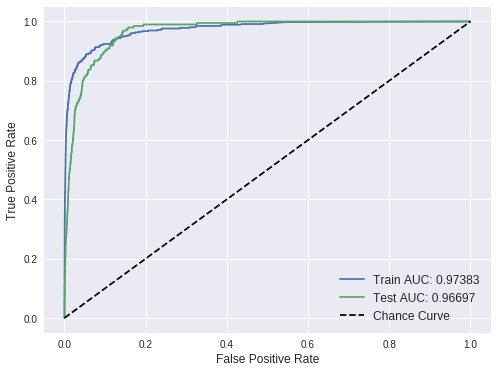

In [141]:
model_eval(model = best_gbm2, name = 'best_gbm_grid')

In [136]:
naive_model = H2OGradientBoostingEstimator(balance_classes=False, seed=42)
naive_model.train(x=feature, y=target, training_frame=train, validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


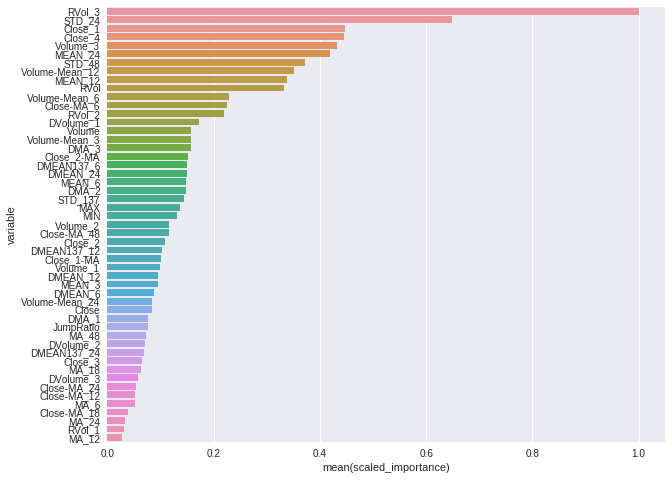

In [137]:
importance = naive_model.varimp(use_pandas = True)

fig, ax = plt.subplots(figsize = (10,8))


sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.savefig('importances.jpg')
plt.show()

In [0]:
def model_eval(model, name):
    train_true = train.as_data_frame()['Label'].values
    test_true = test.as_data_frame()['Label'].values
    train_pred = model.predict(train).as_data_frame()['p1'].values
    test_pred = model.predict(test).as_data_frame()['p1'].values

    train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
    test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
    train_auc = np.round(auc(train_fpr, train_tpr), 5)
    test_auc = np.round(auc(test_fpr, test_tpr), 5)

    print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(float)))

    train_fpr = np.insert(train_fpr, 0, 0)
    train_tpr = np.insert(train_tpr, 0, 0)
    test_fpr = np.insert(test_fpr, 0, 0)
    test_tpr = np.insert(test_tpr, 0, 0)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
    ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
    ax.plot(train_fpr, train_fpr, 'k--', label='Chance Curve')
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.grid(True)
    ax.legend(fontsize=12)
    plt.savefig(name+''+'output.jpg' )
    plt.show()


gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     32100
           1       0.33      0.15      0.21       197

   micro avg       0.99      0.99      0.99     32297
   macro avg       0.66      0.58      0.60     32297
weighted avg       0.99      0.99      0.99     32297



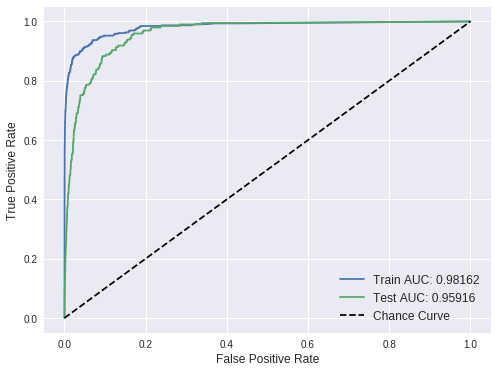

In [148]:
model_eval(model = naive_model, name  ='naive_model')